In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_confusion_matrix, silhouette_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA 
from pprint import pprint

# Machine Learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

### Data Exploration & Visualization

In [2]:
crimes = pd.read_csv('Violence.csv')

In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CASE_NUMBER                   21812 non-null  object 
 1   DATE                          21812 non-null  object 
 2   BLOCK                         21812 non-null  object 
 3   PRIMARY_TYPE                  21812 non-null  object 
 4   UNIQUE_ID                     21812 non-null  object 
 5   ZIP_CODE                      21812 non-null  int64  
 6   WARD                          21812 non-null  int64  
 7   COMMUNITY_AREA                21812 non-null  object 
 8   STREET OUTREACH ORGANIZATION  21812 non-null  object 
 9   AREA                          21812 non-null  int64  
 10  DISTRICT                      21812 non-null  int64  
 11  BEAT                          21812 non-null  int64  
 12  AGE                           21550 non-null  object 
 13  S

In [4]:
crimes.head()

,CASE_NUMBER,DATE,BLOCK,PRIMARY_TYPE,UNIQUE_ID,ZIP_CODE,WARD,COMMUNITY_AREA,STREET OUTREACH ORGANIZATION,AREA,...,FBI_CD,FBI_DESCR,IUCR_CD,IUCR_SECONDARY,MONTH,DAY_OF_WEEK,HOUR,LATITUDE,LONGITUDE,LOCATION
0,HZ100096,01/01/2016 02:04:00 AM,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,...,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142)
1,HZ100342,01/01/2016 06:39:00 AM,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,...,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858)
2,HZ101042,01/01/2016 10:06:00 PM,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,...,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858)
3,HZ101842,01/02/2016 04:40:00 PM,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,...,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858)
4,HZ103309,01/04/2016 08:22:00 AM,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,...,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858)


In [5]:
# The list of the features in dataset
list(crimes.columns)

['CASE_NUMBER',
 'DATE',
 'BLOCK',
 'PRIMARY_TYPE',
 'UNIQUE_ID',
 'ZIP_CODE',
 'WARD',
 'COMMUNITY_AREA',
 'STREET OUTREACH ORGANIZATION',
 'AREA',
 'DISTRICT',
 'BEAT',
 'AGE',
 'SEX',
 'RACE',
 'FBI_CD',
 'FBI_DESCR',
 'IUCR_CD',
 'IUCR_SECONDARY',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION']

In [6]:
# Number of distinct crimes in the city
ans = crimes['PRIMARY_TYPE'].unique()
print("The Number of distinct crimes in City:", len(ans))
print()
print("The Distinct Crimes are :\n", ans)

The Number of distinct crimes in City: 3

The Distinct Crimes are :
 ['FATAL SHOOTING' 'NON-FATAL SHOOTING' 'NON-SHOOTING HOMICIDE']


In [7]:
crime_count = pd.DataFrame(crimes.groupby('PRIMARY_TYPE').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count.head()

,PRIMARY_TYPE,counts
0,NON-FATAL SHOOTING,17833
1,FATAL SHOOTING,3566
2,NON-SHOOTING HOMICIDE,413


In [8]:
crimes.DATE = pd.to_datetime(crimes.DATE)

In [9]:
crimes.DATE = pd.to_datetime(crimes.DATE, format = '%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.DATE)

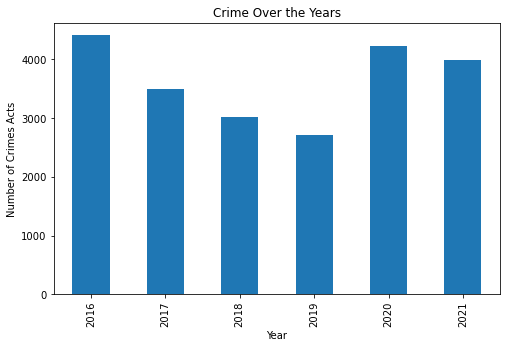

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [10]:
plt.figure(figsize = (8,5))
crimes.groupby([crimes.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))

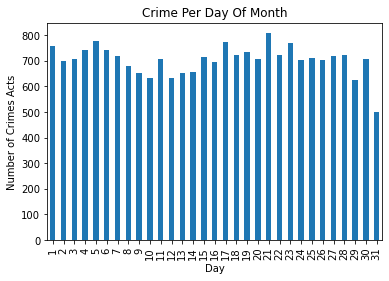

In [11]:
crimes.groupby([crimes.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

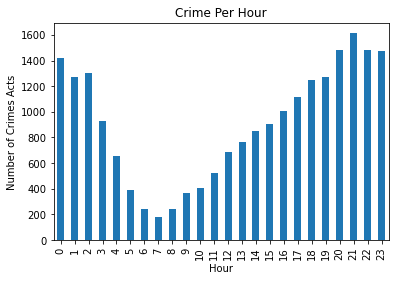

In [12]:
crimes.groupby([crimes.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

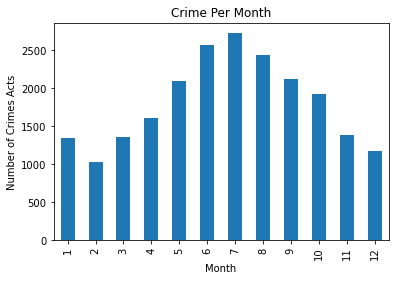

In [13]:
crimes.groupby([crimes.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()



In [14]:
print("Number of Missing Values in the whole dataset : ", crimes.isna().sum().sum())

Number of Missing Values in the whole dataset :  676


In [15]:
# Let's count number of null entries per feature
missing_values = list(crimes.isna().sum())
# missing values is a list of the number of missing values in each column

cols = list(crimes.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

print("Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

Missing Values per feature >>


,Others,AGE,SEX,RACE
Missing Values,0,262,207,207


In [16]:
# Drop NAN rows
crimes = crimes.dropna()

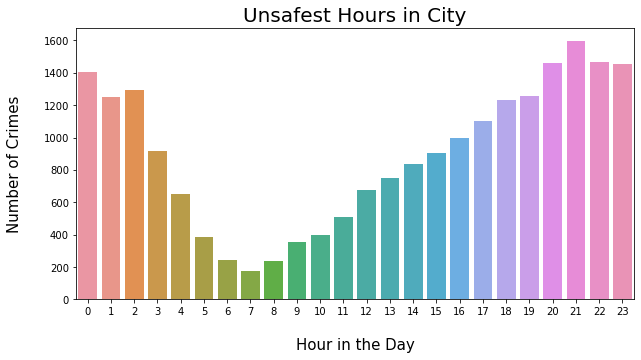

In [17]:
# plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='HOUR', data=crimes)

plt.title("Unsafest Hours in City", fontdict={'fontsize': 20})
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15})
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15})
plt.show()

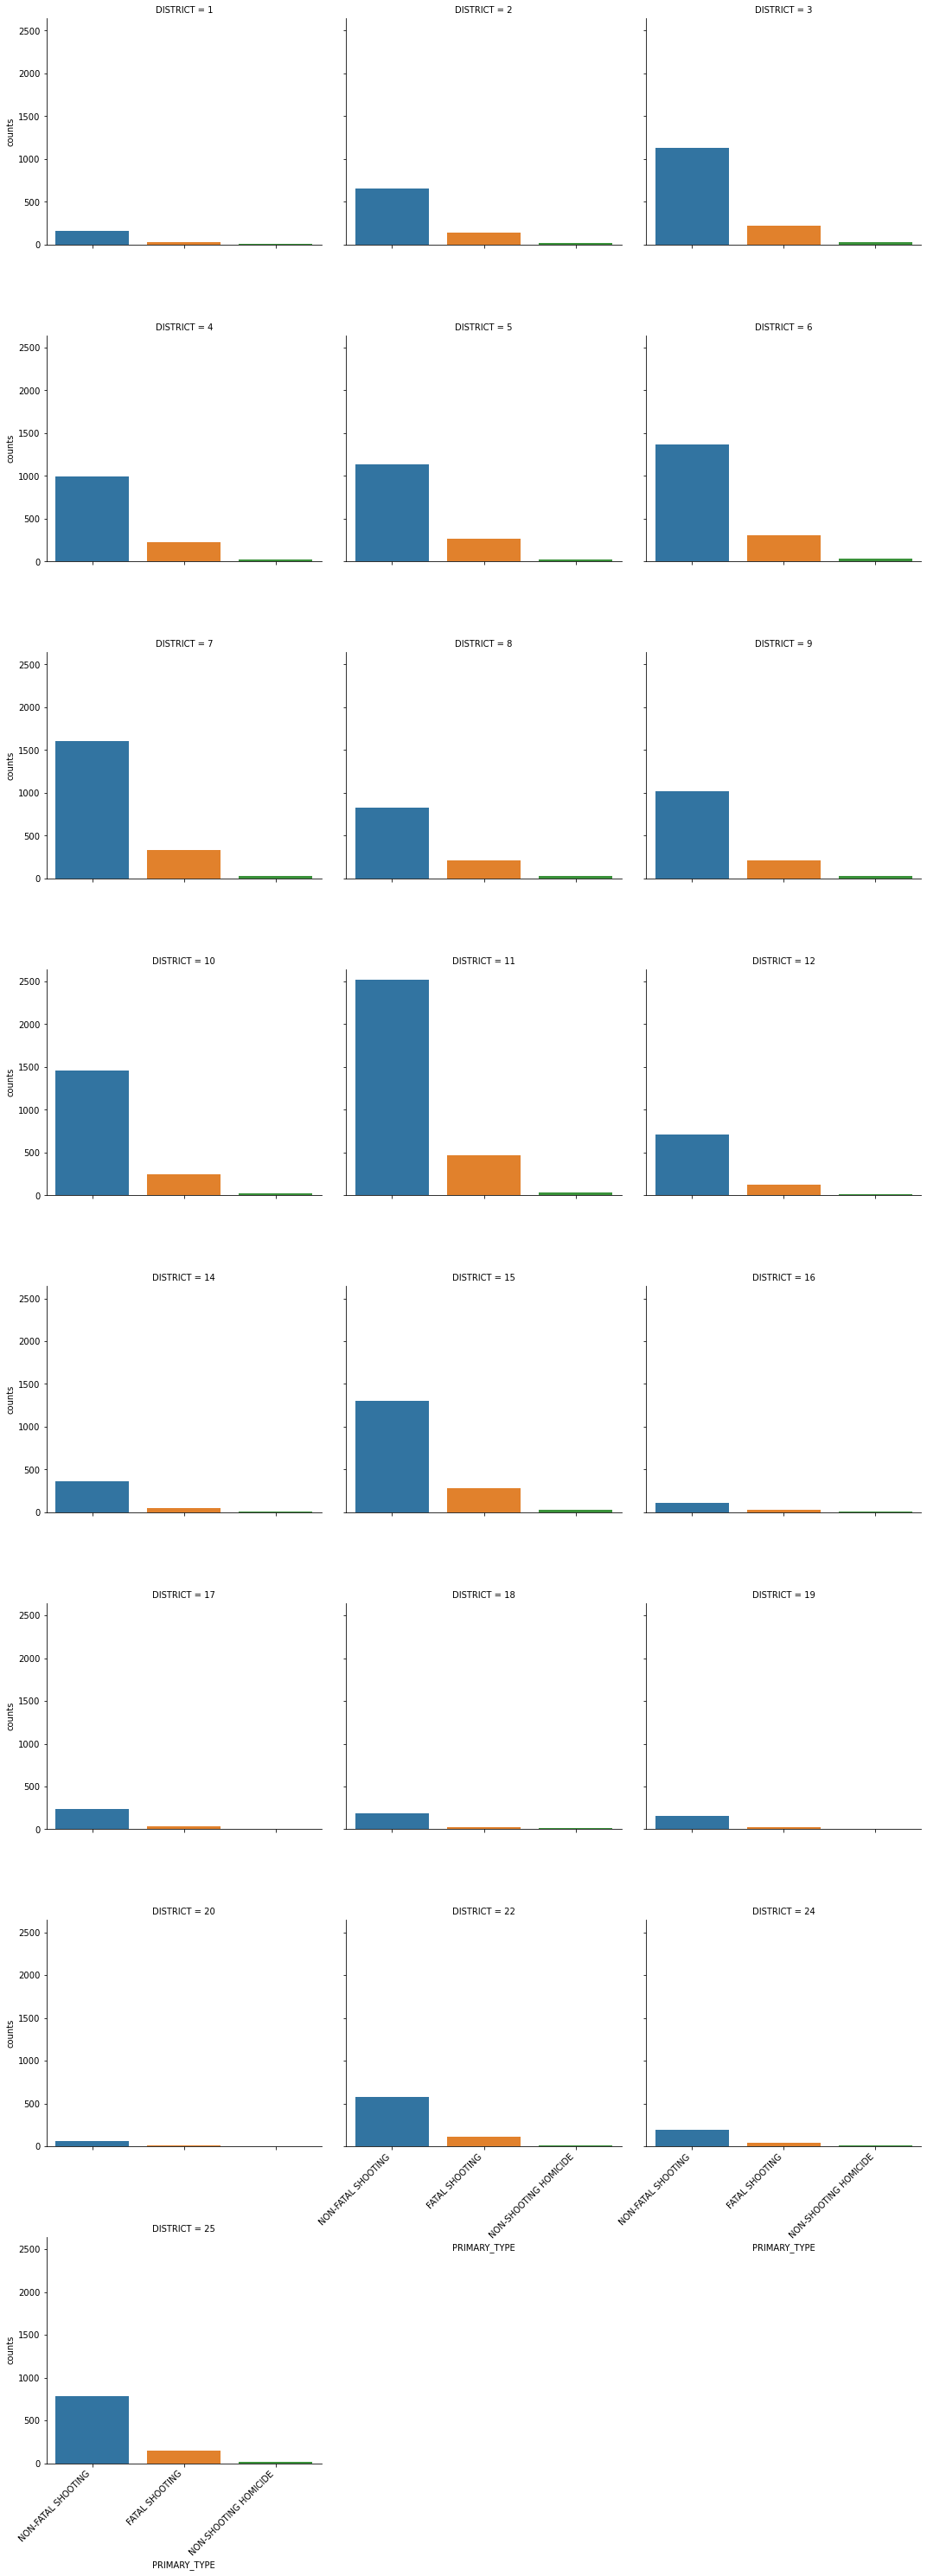

In [18]:
# Most Common Occurences per District
%matplotlib inline
ds = crimes.groupby(['DISTRICT', 'PRIMARY_TYPE']).size().reset_index(name='counts').groupby('DISTRICT').apply(lambda x: x.sort_values('counts',ascending=False).head(3))

# factor plot to make multiple plots
g =sns.catplot("PRIMARY_TYPE", y='counts', col="DISTRICT", col_wrap=3,
                   data=ds, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45, ha='right')

plt.subplots_adjust(hspace=0.4)

In [19]:
# Top 5 criminal districts
top_5_District = crimes['DISTRICT'].value_counts().sort_values(ascending=False).head()
top_5_District

11    3021
7     1972
10    1737
6     1717
15    1603
Name: DISTRICT, dtype: int64

In [20]:
# Crime Activity Per Month/Year
crime_activity_plot = pd.DataFrame(crimes.groupby(['MONTH', crimes.index.year]).size().sort_values(ascending=False).rename('Count').reset_index())
crime_activity_plot.head()

,MONTH,DATE,Count
0,7,2021,599
1,7,2020,579
2,6,2020,557
3,6,2021,504
4,8,2020,494


<AxesSubplot:xlabel='DATE', ylabel='MONTH'>

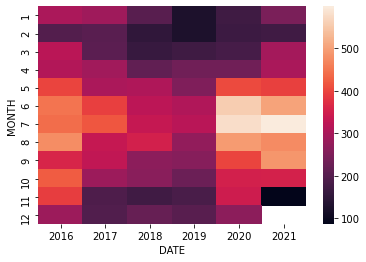

In [21]:
crime_activity_pivot_table = crime_activity_plot.pivot_table(values='Count',index='MONTH',columns='DATE')
sns.heatmap(crime_activity_pivot_table)

- 2017 - 2019 had the highest crime activity in the five-year period
- Throughout the 2016 - 2021 period, January & February had the highest crime activity and most recently November 2021

In [22]:
# Fill nan with mean of column 
crime_activity_pivot_table = crime_activity_pivot_table.fillna(crime_activity_pivot_table.mean())
crime_activity_pivot_table

DATE,2016,2017,2018,2019,2020,2021
MONTH,,,,,,
1,303.0,290.0,204.0,125.0,171.0,245.000000
2,198.0,206.0,151.0,126.0,167.0,174.000000
3,321.0,208.0,162.0,171.0,181.0,295.000000
4,312.0,292.0,215.0,234.0,233.0,302.000000
5,400.0,303.0,308.0,251.0,406.0,395.000000
6,450.0,393.0,324.0,310.0,557.0,504.000000
7,441.0,417.0,335.0,319.0,579.0,599.000000
8,478.0,336.0,353.0,273.0,494.0,476.000000
9,361.0,329.0,268.0,259.0,399.0,488.000000


- The months in 2020 with the highest crime activity are June & July.
- Throughout the 5-year period, these months recorded the highest crime activity

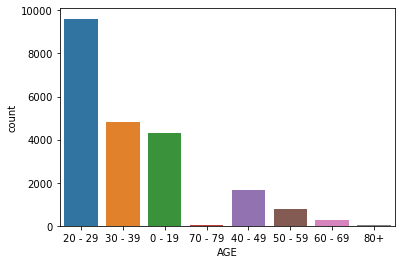

In [23]:
# plot age distribution of violent crimes
sns.countplot(x ='AGE', data = crimes)
plt.show()

Violent offenders seem to be young adults within the age 20-29

### Modeling

1. Proper splitting/partitioning of data to ensure results are robust.
2. Fitting of several models and exploration of different hyper parameters.
3. Discussion of machine learning models chosen for exploration. For those chosen, detail on why the final hyper parameters were chosen.
4. Visualizations on model results and clear explanation on the final model.

In [24]:
# drop index column
crimes = crimes.reset_index(drop=True)

# select relevant columns - remove features that communicate the same information to make our model robust
X = crimes[['BLOCK', 'PRIMARY_TYPE', 'WARD', 'COMMUNITY_AREA',
                   'STREET OUTREACH ORGANIZATION', 'AREA', 'DISTRICT', 
            'BEAT','SEX', 'RACE', 'FBI_DESCR', 'IUCR_SECONDARY',
           'MONTH', 'DAY_OF_WEEK', 'HOUR']]


# fill nan values with 0
X = X.fillna(0)
y = crimes['AGE']

In [25]:
# Scale numerical features using MinMax Scaler
num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


# Select numeric columns
X_numeric = X.select_dtypes(include=['float64'])


# Select categorical columns
X_cat = X.select_dtypes(include=['object'])
categ = X_cat.columns


# Encode Categorical Columns
le = LabelEncoder()
X[categ] = X[categ].apply(le.fit_transform)
X.head()

,BLOCK,PRIMARY_TYPE,WARD,COMMUNITY_AREA,STREET OUTREACH ORGANIZATION,AREA,DISTRICT,BEAT,SEX,RACE,FBI_DESCR,IUCR_SECONDARY,MONTH,DAY_OF_WEEK,HOUR
0,4861,0,0.061224,28,26,0.00,0.041667,0.045380,2,2,1,28,0.0,0.833333,0.086957
1,2096,0,0.306122,50,30,0.00,0.333333,0.338696,2,2,1,28,0.0,0.833333,0.260870
2,6220,0,0.306122,23,60,0.00,0.250000,0.247937,2,2,1,28,0.0,0.833333,0.956522
3,6369,0,0.387755,76,32,0.00,0.083333,0.083746,2,2,1,28,0.0,1.000000,0.695652
4,4263,0,0.734694,5,48,0.75,0.583333,0.582508,2,2,1,28,0.0,0.166667,0.347826


In [26]:
# Encode target column
te = LabelEncoder()
Y = te.fit_transform(y)
Y

array([1, 2, 2, ..., 3, 0, 3])

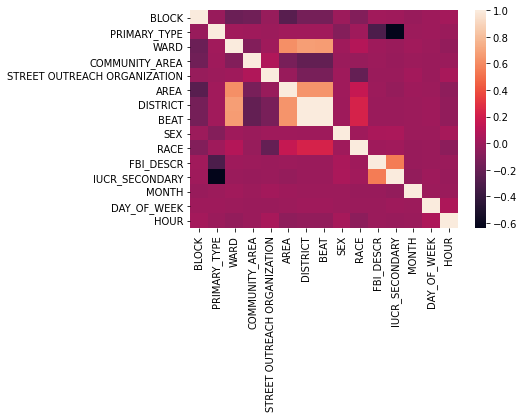

In [27]:
# Correlation Matrix 
correlation_mat = X.corr()
sns.heatmap(correlation_mat)
plt.show()

In [28]:
# Split dataset in train & test
# Synthetic Minority Oversampling Technique to deal with class imbalance
smote = SMOTE()
#source:https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

# Stratify target variable 
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, stratify=y_smote, 
                                                    test_size=0.2,
                                                    random_state=42)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

# Print number of observations
print('Train samples: ', len(X_train), len(y_train))
print('Test samples: ', len(X_test), len(y_test))

Original dataset shape Counter({'20 - 29': 9611, '30 - 39': 4796, '0 - 19': 4314, '40 - 49': 1667, '50 - 59': 797, '60 - 69': 280, '70 - 79': 57, '80+': 26})
Resample dataset shape Counter({1: 9611, 2: 9611, 0: 9611, 6: 9611, 3: 9611, 4: 9611, 5: 9611, 7: 9611})
Train samples:  61510 61510
Test samples:  15378 15378


#### RANDOM FOREST 

In [29]:
rf_model = RandomForestClassifier()
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
# Train Random Forest Model
rf_model.fit(X_train, y_train)

# Make predictions with model
y_pred = rf_model.predict(X_test)


print(f"Training Data Score: {rf_model.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test, y_test)}")
print()
print(classification_report(y_test, y_pred))
print()
print('RANDOM FOREST CONFUSION MATRIX')
cm = confusion_matrix(y_test, y_pred)

Training Data Score: 0.9869939847179321
Testing Data Score: 0.7722070490310834

              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1922
           1       0.50      0.57      0.53      1922
           2       0.57      0.48      0.52      1922
           3       0.75      0.72      0.74      1923
           4       0.83      0.87      0.85      1922
           5       0.92      0.96      0.94      1922
           6       0.99      1.00      0.99      1923
           7       1.00      1.00      1.00      1922

    accuracy                           0.77     15378
   macro avg       0.77      0.77      0.77     15378
weighted avg       0.77      0.77      0.77     15378


RANDOM FOREST CONFUSION MATRIX


In [31]:
rf_results = cross_val_score(rf_model, x_smote, y_smote, cv=3)
print(("Cross Validation Accuracy: %.3f%% (%.3f%%)") % (rf_results.mean()*100.0, rf_results.std()*100.0))

Cross Validation Accuracy: 71.455% (4.021%)


#### ADA BOOST

In [32]:
ada_model = AdaBoostClassifier()
ada_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [33]:
# Train Ada Boost Model
ada_model.fit(X_train, y_train)

# Make predictions with model
y_pred = ada_model.predict(X_test)


print(f"Training Data Score: {ada_model.score(X_train, y_train)}")
print(f"Testing Data Score: {ada_model.score(X_test, y_test)}")
print()
print(classification_report(y_test, y_pred))
print()

Training Data Score: 0.32090716956592424
Testing Data Score: 0.3198075172324099

              precision    recall  f1-score   support

           0       0.26      0.33      0.29      1922
           1       0.37      0.26      0.31      1922
           2       0.25      0.26      0.25      1922
           3       0.25      0.15      0.19      1923
           4       0.21      0.11      0.15      1922
           5       0.29      0.32      0.31      1922
           6       0.31      0.41      0.35      1923
           7       0.50      0.71      0.59      1922

    accuracy                           0.32     15378
   macro avg       0.31      0.32      0.30     15378
weighted avg       0.31      0.32      0.30     15378




In [34]:
ada_results = cross_val_score(ada_model, x_smote, y_smote, cv=3)
print(("Cross Validation Accuracy: %.3f%% (%.3f%%)") % (ada_results.mean()*100.0, ada_results.std()*100.0))

Cross Validation Accuracy: 29.015% (0.912%)


#### Hyperparameter tuning the best model

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
print('Best Random Forest Parameters: ')
print(rf_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Random Forest Parameters: 
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [37]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
pprint(param_grid)

{'bootstrap': [True],
 'max_depth': [80, 90, 100, 110],
 'max_features': [2, 3],
 'min_samples_leaf': [3, 4, 5],
 'min_samples_split': [8, 10, 12],
 'n_estimators': [100, 200, 300, 1000]}


#### Using k-means clustering algorithm to cluster data per crime type 

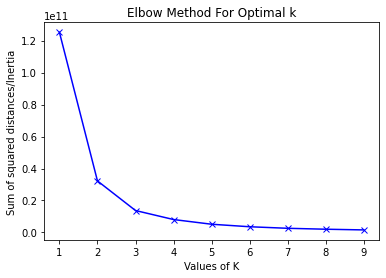

In [41]:
# Append target variable back into dataset
X['AGE_RANGE'] = Y
dataframe = X
dataframe.head()

# Find the optimal value of K for clustering
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(dataframe)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

Optimal number for K = 3

In [42]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)

kmeans.fit(dataframe)

# The lowest SSE value
print('The lowest SSE value: ')
print(kmeans.inertia_)
print()
# Final locations of the centroid
print('Final locations of the centroid: ')
print(kmeans.cluster_centers_)
print()
# The number of iterations required to converge
print('The number of iterations required to converge: ')
print(kmeans.n_iter_)

The lowest SSE value: 
13708698382.151882

Final locations of the centroid: 
[[1.37277601e+03 8.58741682e-01 4.25099078e-01 4.60184513e+01
  3.54680883e+01 4.65403811e-01 4.04239766e-01 4.05341311e-01
  1.86206897e+00 2.85964912e+00 3.02329099e-01 1.16778584e+01
  5.24308420e-01 4.91076830e-01 5.53736290e-01 1.34407139e+00]
 [6.98330116e+03 8.45941686e-01 3.28361289e-01 3.61622012e+01
  3.59234305e+01 2.31809824e-01 3.02967122e-01 3.04623572e-01
  1.86656160e+00 2.40701340e+00 3.34646703e-01 1.19155503e+01
  5.17909592e-01 4.94264951e-01 5.83650255e-01 1.40084056e+00]
 [4.21000669e+03 8.57279432e-01 4.49531465e-01 3.60538104e+01
  3.37196121e+01 5.32538924e-01 4.17258490e-01 4.18593249e-01
  1.87544387e+00 3.41382136e+00 3.22589456e-01 1.16003824e+01
  5.16128231e-01 4.96244196e-01 5.60158189e-01 1.33337886e+00]]

The number of iterations required to converge: 
6
